# Script for analyzing Chl-a and NPP in Gürses et al. 2022 #

## 1. Configuration

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 5

# necessary modules -------------------------------------------------------------------------------------
import sys
import os
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/')
import pyfesom2 as pf
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/SkillMetrics/')
import skill_metrics as sm
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/modules/cmocean-master/')
import cmocean as cmo
sys.path.append('/home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import time
from datetime import date
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset

Autosaving every 5 seconds


In [2]:
#    Only modify parameters and paths in this cell       #
#  In principle, you don't have to modify anything else  #


# run specification -------------------------------------------------------------------------------------   
runid      =  'fesom'
simu_name = 'standard'

# defines paths ----------------------------------------------------------------------------------------- 

runname     = 'A'
resultpath  = '/work/ollie/ogurses/output_f2r2/fesom2.1_recom_New_Initial_Conditions/'+runname+'/'
meshpath    = '/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz'
savepath    = os.getcwd()+'/'
evalpath    = '/work/ollie/projects/MarESys/evaluation/'
evalpath2   = '/work/ollie/ogurses/input/corrected_input/'

# period of analysis ------------------------------------------------------------------------------------
first_year_maps = 2012
first_year = 2012
last_year  = 2021
    
years = np.arange(first_year,last_year+1,1)
years_last10 = np.arange(first_year_maps,last_year+1,1)

# specification of analysis ------------------------------------------------------------------------------------

layerwise = False
depths = (0,50,200,1000,2000) # If layerwise is True, you can define depths here, by defaut: (0,50,200,1000,2000,4000)
depth_limit = 50
mapproj = 'rob'
#Map projection. Options are Mercator (merc), Plate Carree (pc),
#North Polar Stereo (np), South Polar Stereo (sp),  Robinson (rob)
#Robinson projection is quite time consuming.

# export of analysis ------------------------------------------------------------------------------------
savefig = True
verbose = False
output = False
plotting = True
Taylor = False

In [3]:
# Prepare output files & paths ----------------------------------------------------------------------
today = date.today().strftime("_%Y_%m_%d")
htmlname     =  simu_name+'_'+ today +'.html'
htmlpath = savepath

if not os.path.exists(htmlpath): # create folders if do not exist
    os.makedirs(htmlpath)
if not os.path.exists(savepath):
    os.makedirs(savepath)
    
# initialization input file specifications -----------------------------------------------------------

ncfileAlk                = evalpath2+'GLODAPv2.2016b.TAlk_mmol.nc'
ncfileDIC                = evalpath2+'GLODAPv2.2016b.TCO2_mmol.nc'
ncfileDSi                = evalpath2+'woa13_all_i00_01_fesom2.nc'
ncfileDIN                = evalpath2+'woa13_all_n00_01_fesom2.nc'
ncfileDO2                = evalpath2+'woa18_all_o00_01_mmol_fesom2.nc'
ncfileDFe                = evalpath2+'fe_pisces_opa_eq_init_3D_changed_name.nc' 
ncfileNPPTotalGlobal     = evalpath+'fesom.initial.mesh.diag.nc'
ncfileCO2fluxTotalGlobal = evalpath+'fesom.initial.mesh.diag.nc'
ncfileTemp               = evalpath2+'woa18_decav_t00_01_fesom2.nc'
ncfileSal                = evalpath2+'woa18_decav_s00_01_fesom2.nc'
ncfilePHC3               = evalpath2+'phc3.0_annual.nc'      
ncfilepCO2               = evalpath+'SOCATv6_tracks_gridded_monthly.nc'
ncfileMLD                = evalpath+'mld_DR003.nc'
matfileChlsurf           = evalpath+'climatology_annual_chl_1deg_OCCCI_2012_2015.mat'
txtfileCO2flux           = evalpath+'CO2_flux2015_Takahashietal2009_original.txt'
ncfileMaredat            = evalpath+'MarEDat20120716Diatoms.nc'
ncfileJohnson2013        = evalpath+'Johnson2013_MEAN_1x1_Chl_mg_m3.npy'
matfileNPPvgpm           = evalpath+'VGPM_CLIM.mat'
matfileNPPcpbm           = evalpath+'CBPM_CLIM.mat'
matfileMLD               = evalpath+'GlobalML_Climato_1970_2018.mat'

# just to check
if(verbose):
    print('Processing years {4} to {5}\n\nReading out of {0}\nStoring graphs to {1}\nStoring html to {2} as {3}'.format(
        resultpath, savepath, htmlpath, htmlname,years[0],years[-1]))

    print('\nLast ten years are \n{0}'.format(years_last10))
    
# mesh initialization -----------------------------------------------------------
mesh = pf.load_mesh(meshpath)

/work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2
The usepickle == True)
The pickle file for FESOM2 exists.
The mesh will be loaded from /work/ollie/mozeisin/mesh/mesh_fesom2.0/core2_meanz/pickle_mesh_py3_fesom2


## 2. Global Chl-a maps

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_OCCCI_Comparison_python3.ipynb to python
[NbConvertApp] Writing 14687 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_OCCCI_Comparison_python3.py
 !!! Satellite data only for 2012-2015 period !!!


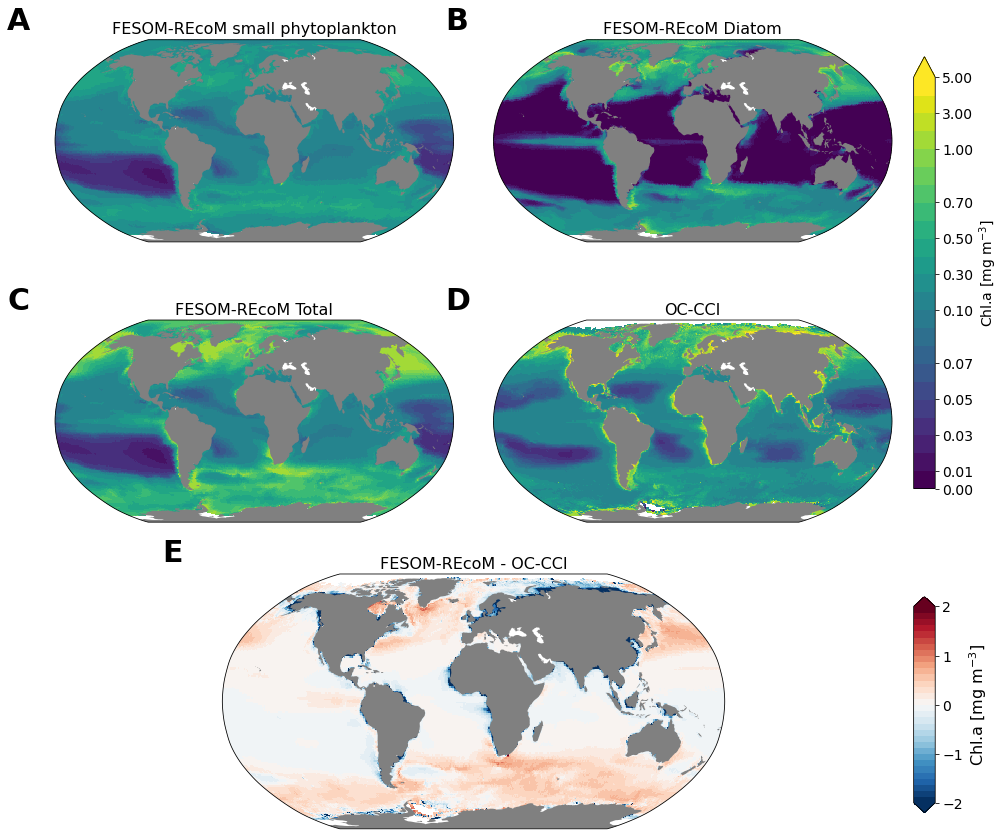


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.44394, ref: 0.44571
CRMS pred: 0.36787, ref: 0.00000
CORRCOEF: 0.65804

Normalized Taylor stats:
SDEV pred: 0.99603, ref: 1.00000
CRMS pred: 0.82536, ref: 0.00000
CORRCOEF: 0.65804


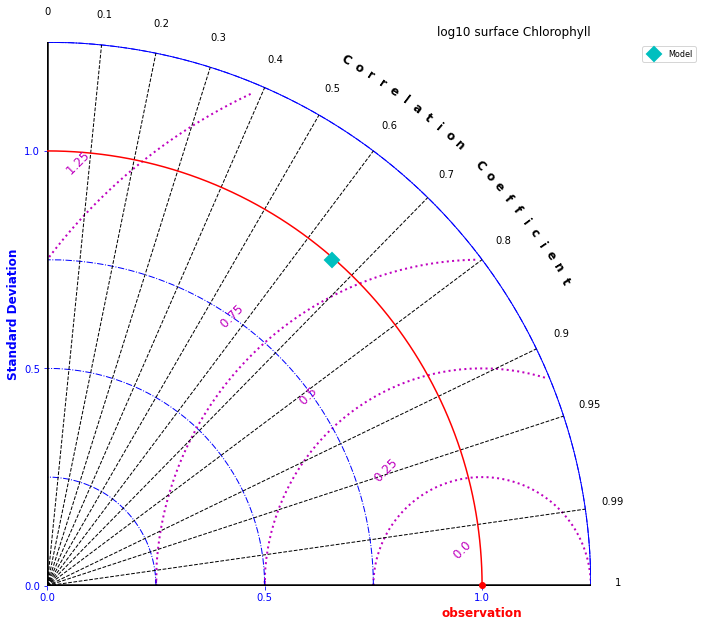

In [4]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_OCCCI_Comparison_python3.ipynb
from Chlsurf_OCCCI_Comparison_python3 import Chlsurf_OCCCI_comp

# analyze only last 10 years, surface only
Chlsurf_OCCCI_comp(runid,resultpath,savepath,mesh,matfileChlsurf,
                          first_year,last_year,
                          mapproj='rob',savefig=True)

## 3. Southern Ocean Chl-a maps

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_SO_Johnson2013_Comparison_python3.ipynb to python
[NbConvertApp] Writing 15000 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_SO_Johnson2013_Comparison_python3.py


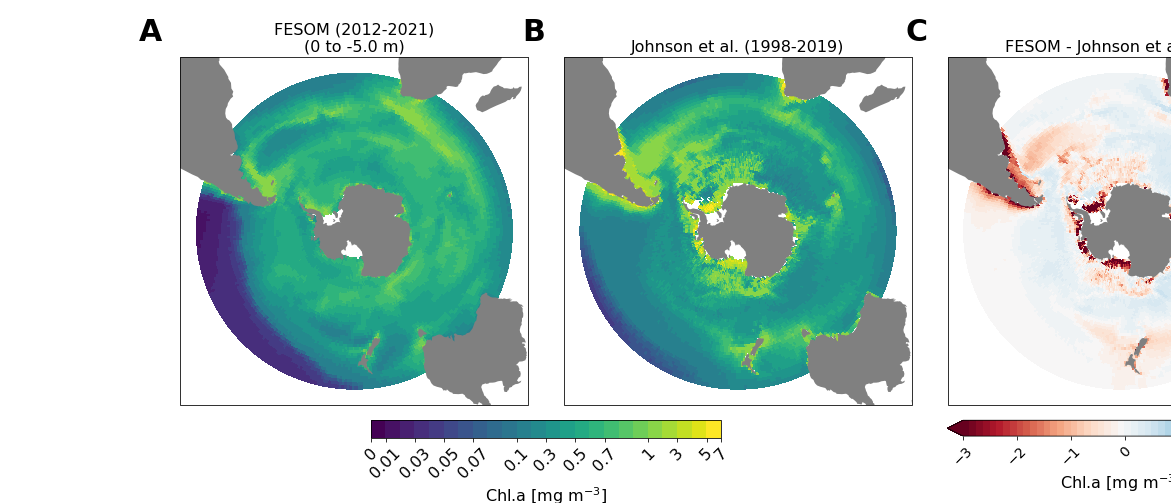


Statistics for log10 surface Chlorophyll

Original Taylor stats:
SDEV pred: 0.35334, ref: 0.33909
CRMS pred: 0.31237, ref: 0.00000
CORRCOEF: 0.59388

Normalized Taylor stats:
SDEV pred: 1.04202, ref: 1.00000
CRMS pred: 0.92121, ref: 0.00000
CORRCOEF: 0.59388
Adjust axis max to 1.5


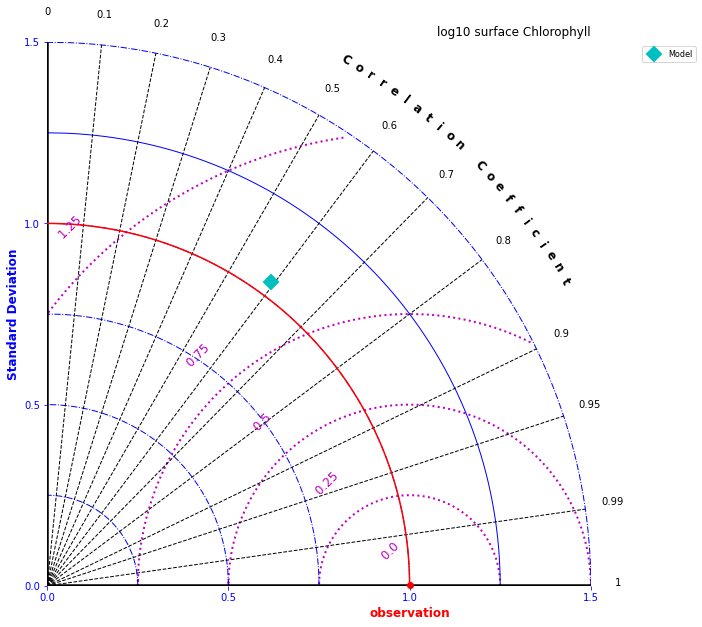

In [4]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chlsurf_SO_Johnson2013_Comparison_python3.ipynb
from Chlsurf_SO_Johnson2013_Comparison_python3 import Chlsurf_SO_comp

# analyze only last 10 years, surface only
Chlsurf_SO_comp(runid,resultpath,savepath,mesh,ncfileJohnson2013,
                          first_year,last_year,
                          #first_year,last_year,
                          mapproj='sp',savefig=True)

## 4. latitudinal Chl-a and NPP plots

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chl_NPP_lat_comparison_python3.ipynb to python
[NbConvertApp] Writing 6750 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chl_NPP_lat_comparison_python3.py
 !!! Satellite data for the 1998-2019 period only !!!
 NPP SAT Southern Ocean [PgC / yr] =  3.9206203734774023
 NPP REcoM Southern Ocean [PgC / yr] =  3.241458790085332
 NPP SAT Global [PgC / yr] =  68.93480650824961
 NPP REcoM Global [PgC / yr] =  38.49617984337564
 !!! Satellite data for the 1998-2019 period only !!!
 NPP SAT Southern Ocean [PgC / yr] =  3.482732855576151
 NPP REcoM Southern Ocean [PgC / yr] =  3.241458790085332
 NPP SAT Global [PgC / yr] =  50.49647800498724
 NPP REcoM Global [PgC / yr] =  38.49617984337564
 !!! Satellite data only for 2012-2015 period !!!


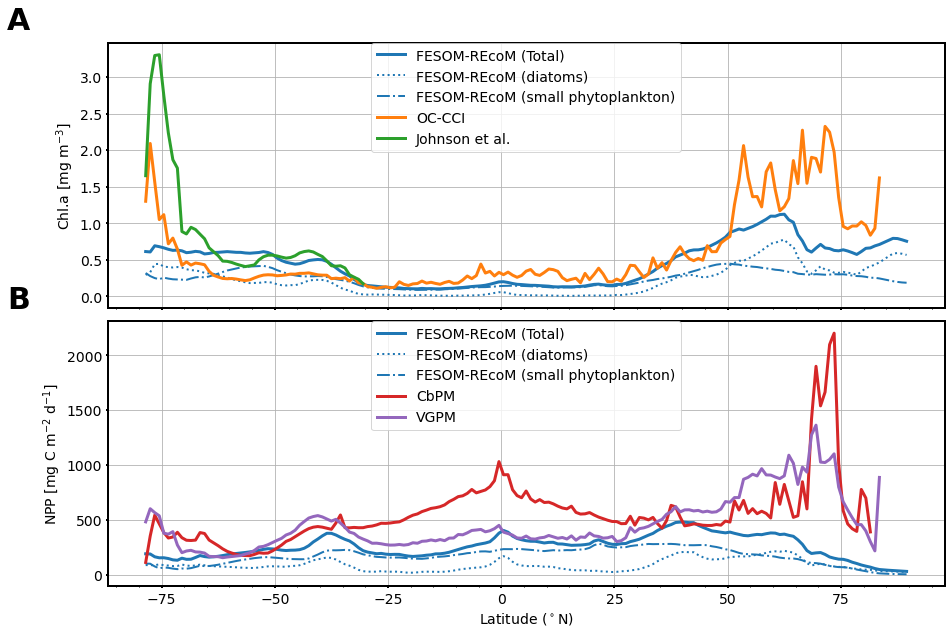

In [4]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/Chl_NPP_lat_comparison_python3.ipynb
from Chl_NPP_lat_comparison_python3 import Chl_NPP_lat_comp

Chl_NPP_lat_comp(runid,resultpath,savepath,mesh,
                            matfileChlsurf,ncfileJohnson2013,matfileNPPcpbm,matfileNPPvgpm,
                            first_year,last_year, savefig=savefig, output=output, 
                            plotting=plotting)

## 5. Global NPP Maps

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.ipynb to python
[NbConvertApp] Writing 14455 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.py
 !!! Satellite data for the 1998-2019 period only !!!
 NPP SAT Southern Ocean [PgC / yr] =  3.482732855576151
 NPP REcoM Southern Ocean [PgC / yr] =  3.241458790085332
 NPP SAT Global [PgC / yr] =  50.49647800498724
 NPP REcoM Global [PgC / yr] =  38.49617984337564


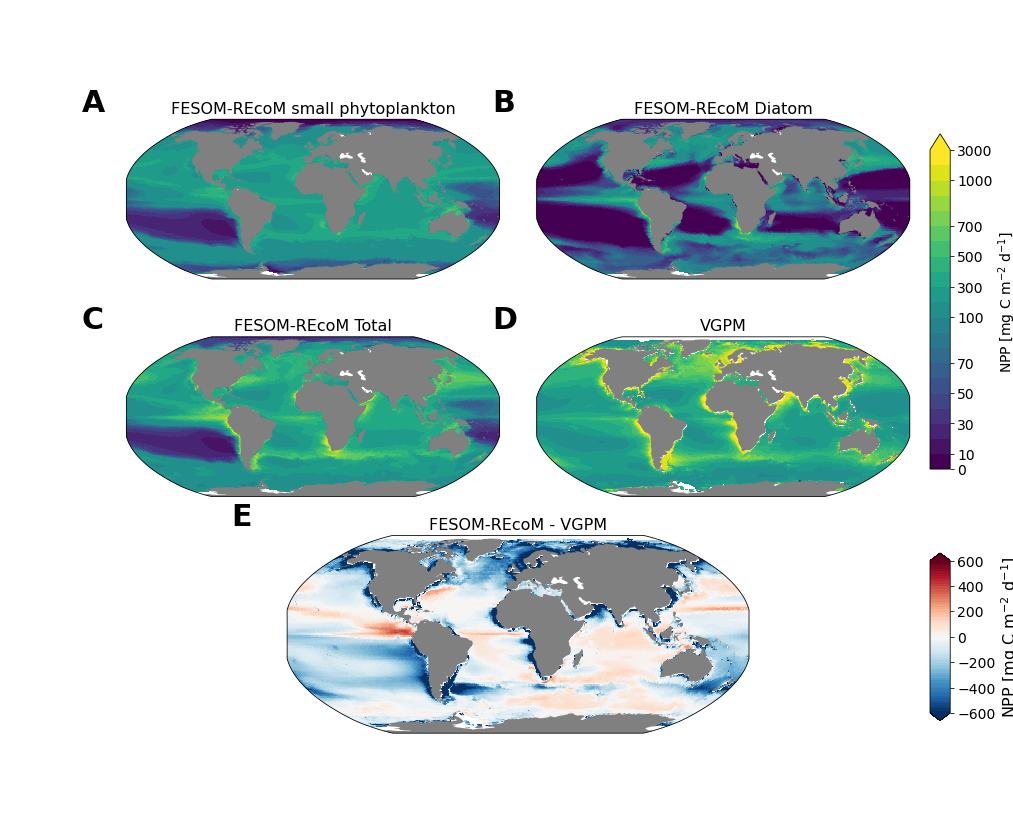


Statistics for log10 surface NPP

Original Taylor stats:
SDEV pred: 0.35862, ref: 0.27332
CRMS pred: 0.34409, ref: 0.00000
CORRCOEF: 0.43314

Normalized Taylor stats:
SDEV pred: 1.31209, ref: 1.00000
CRMS pred: 1.25895, ref: 0.00000
CORRCOEF: 0.43314
Adjust axis max to 1.5


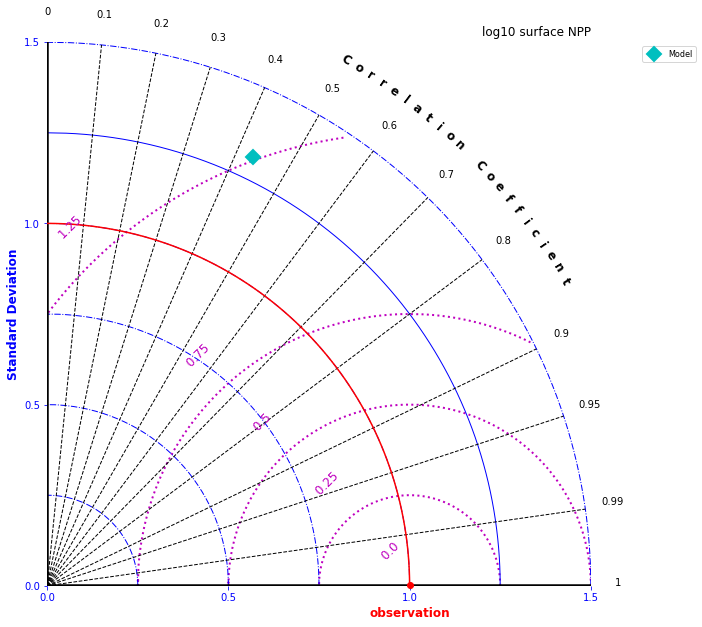

In [4]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.ipynb
from NPPsurf_OCNPP_Comparison_python3 import NPPsurf_OCNPP_comp

# analyze only last 10 years
# WARNING: here FESOM NPP is integrated and compared to Ocean Color NPP (surface)
NPPsurf_OCNPP_comp(runid,resultpath,savepath,mesh,matfileNPPvgpm,
                          first_year_maps,last_year,
                          mapproj=mapproj,savefig=savefig)

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.ipynb to python
[NbConvertApp] Writing 14455 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.py
 !!! Satellite data for the 1998-2019 period only !!!
 NPP SAT Southern Ocean [PgC / yr] =  3.9206203734774023
 NPP REcoM Southern Ocean [PgC / yr] =  3.241458790085332
 NPP SAT Global [PgC / yr] =  68.93480650824961
 NPP REcoM Global [PgC / yr] =  38.49617984337564


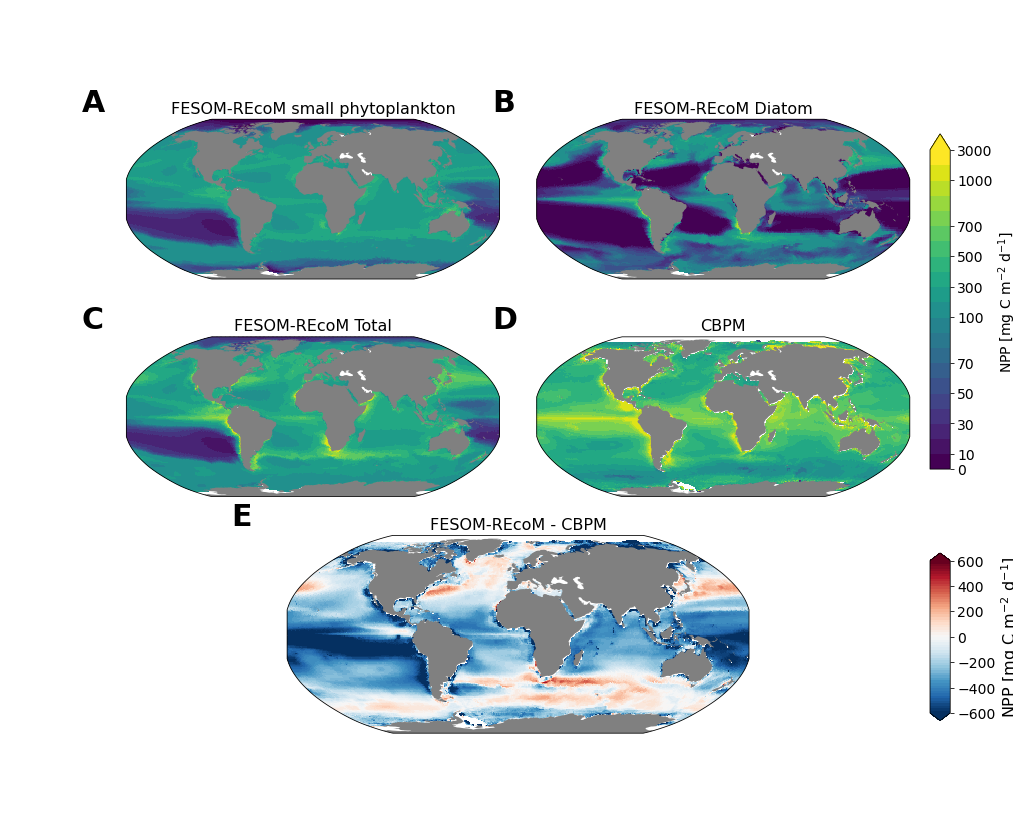


Statistics for log10 surface NPP

Original Taylor stats:
SDEV pred: 0.35482, ref: 0.24674
CRMS pred: 0.41195, ref: 0.00000
CORRCOEF: 0.09755

Normalized Taylor stats:
SDEV pred: 1.43805, ref: 1.00000
CRMS pred: 1.66956, ref: 0.00000
CORRCOEF: 0.09755
Adjust axis max to 1.5


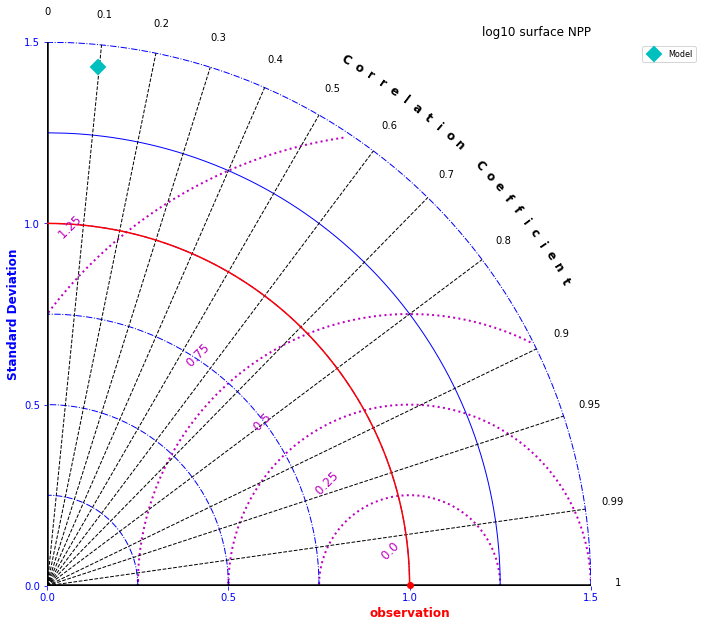

In [5]:
!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPPsurf_OCNPP_Comparison_python3.ipynb
from NPPsurf_OCNPP_Comparison_python3 import NPPsurf_OCNPP_comp

# analyze only last 10 years
# WARNING: here FESOM NPP is integrated and compared to Ocean Color NPP (surface)
NPPsurf_OCNPP_comp(runid,resultpath,savepath,mesh,matfileNPPcpbm,
                          first_year_maps,last_year,
                          mapproj=mapproj,savefig=savefig)

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.ipynb to python
[NbConvertApp] Writing 7277 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.py
TIME-SERIES AVERAGES:
NPP mean =  35.8428685434642
NPPd mean =  10.520572979304145
NPPn mean =  25.322295564062667
EP mean =  5.8679739196090175
SiE mean =  114.76432755343112


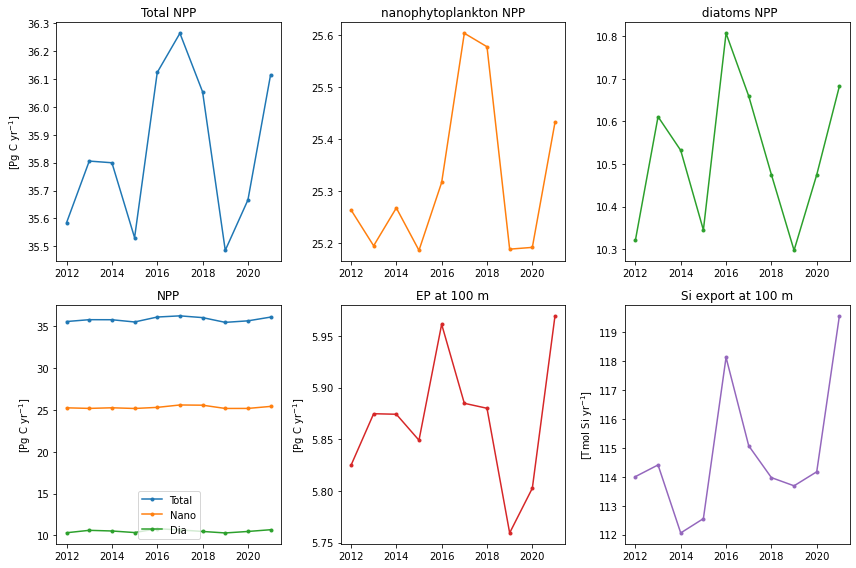

In [9]:
# time-series of NPP and export production

!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.ipynb
from NPP_timeseries_python3 import NPP_timeseries

NPP_timeseries(runid,resultpath,savepath,mesh,first_year_maps,last_year,savefig=savefig,mask="Global Ocean")

[NbConvertApp] Converting notebook /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.ipynb to python
[NbConvertApp] Writing 7277 bytes to /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.py
TIME-SERIES AVERAGES:
NPP mean =  3.2111665686576507
NPPd mean =  1.23358569105891
NPPn mean =  1.9775808768415761
EP mean =  1.116388000888486
SiE mean =  38.864125936804584


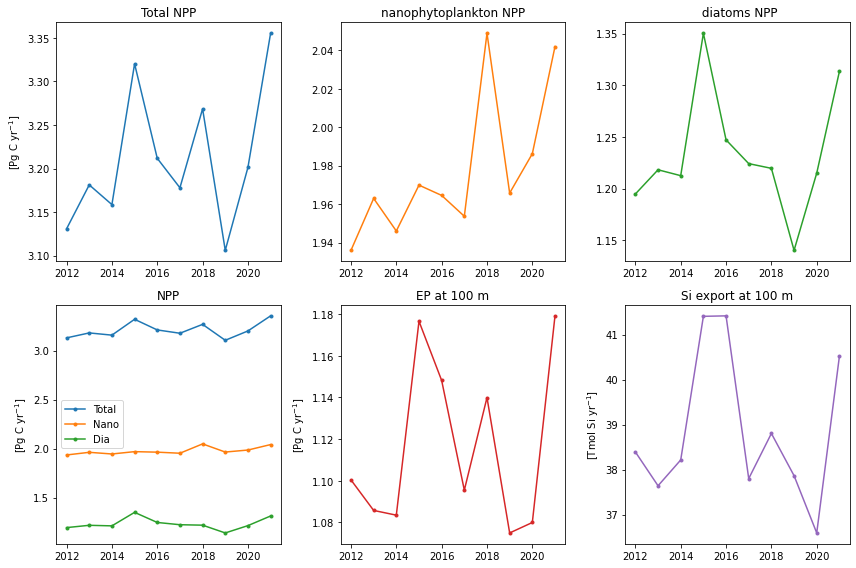

In [10]:
# time-series of NPP and export production

!jupyter nbconvert --to=python /home/ollie/loziel/pyfesom2/codes/py_f2recom_develop/GlobalAssessment/NPP_timeseries_python3.ipynb
from NPP_timeseries_python3 import NPP_timeseries

NPP_timeseries(runid,resultpath,savepath,mesh,first_year_maps,last_year,savefig=savefig,mask="Southern_Ocean_50S")